## Python project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, mean_absolute_error, classification_report
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("crop_yield_train.csv")

# ***Cleaning and Prepration***

### Inspecting the first 5 rows

In [3]:
df.head(5)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26


### Checking the shape of data

In [4]:
df.shape

(276268, 8)

### Checking the data type

In [5]:
df.dtypes

State          object
District       object
Crop           object
Crop_Year       int64
Season         object
Area          float64
Production    float64
Yield         float64
dtype: object

### Checking for null values

In [6]:
df.isnull().sum()

State            0
District         0
Crop             6
Crop_Year        0
Season           0
Area             0
Production    3967
Yield            0
dtype: int64

### Deleting the null vlaues

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

### Checking for duplicate values

In [4]:

df.duplicated().sum()

np.int64(0)

In [5]:
df.shape

(276268, 8)

In [6]:
df['Area ']


0         1361.0
1           13.0
2           39.0
3            9.0
4         6006.0
           ...  
276263      13.0
276264    5991.0
276265      63.0
276266       4.0
276267     279.0
Name: Area , Length: 276268, dtype: float64

### Removing extraspaces form columns

In [7]:

df.columns = df.columns.str.strip()

### Checking for Eiter Production = 0 or Yield = 0

In [8]:

df[(df['Area'] == 0) | (df['Production'] == 0)]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
162,Maharashtra,SATARA,Sesamum,1999,Rabi,100.0,0.0,0.00
572,Haryana,PANCHKULA,Turmeric,2000,Whole Year,1.0,0.0,0.00
804,Maharashtra,AMRAVATI,Bajra,2015,Kharif,100.0,0.0,0.00
1037,Karnataka,HAVERI,Cardamom,2018,Whole Year,2.0,0.0,0.10
1379,Madhya Pradesh,KHANDWA,Niger seed,2001,Kharif,2.0,0.0,0.01
...,...,...,...,...,...,...,...,...
274930,Kerala,WAYANAD,other oilseeds,2002,Whole Year,1.0,0.0,0.00
275323,Uttar Pradesh,GONDA,Moong(Green Gram),2001,Kharif,2.0,0.0,0.05
275742,Madhya Pradesh,SAGAR,Bajra,2002,Kharif,1.0,0.0,0.10
275912,Rajasthan,PALI,Banana,2003,Whole Year,1.0,0.0,0.00


### Droping the low area (Area<10) where production is 0 

In [9]:
df = df[~((df['Production'] == 0) & (df['Area'] < 10))]

In [10]:
df[(df['Area'] == 0) | (df['Production'] == 0)]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
162,Maharashtra,SATARA,Sesamum,1999,Rabi,100.0,0.0,0.0
804,Maharashtra,AMRAVATI,Bajra,2015,Kharif,100.0,0.0,0.0
1595,Haryana,REWARI,Sesamum,2003,Kharif,160.0,0.0,0.0
2174,Rajasthan,NAGAUR,Moth,2003,Whole Year,72.0,0.0,0.0
2229,Haryana,REWARI,Gram,2002,Rabi,304.0,0.0,0.0
...,...,...,...,...,...,...,...,...
271292,Haryana,AMBALA,Bajra,1999,Kharif,371.0,0.0,0.0
271692,Haryana,KURUKSHETRA,Maize,2003,Kharif,260.0,0.0,0.0
271794,Himachal Pradesh,KULLU,Moong(Green Gram),1999,Kharif,10.0,0.0,0.0
273571,Haryana,BHIWANI,Maize,2003,Kharif,91.0,0.0,0.0


Zero-yield cases were carefully evaluated. We preserved those with significant area under cultivation (Area ≥ 10 hectares), as they provide insight into real-world crop failure, improving the model’s ability to generalize and flag risk scenarios

## Checking Caterogical columns

In [15]:
print(df['State'].unique(), '\n')
print(df['District'].unique(), '\n')
print(df['Crop'].unique(), '\n')
print(df['Season'].unique())

['Jharkhand' 'Jammu and Kashmir' 'Haryana' 'Uttar Pradesh' 'Tamil Nadu'
 'Tripura' 'Rajasthan' 'Andhra Pradesh' 'Karnataka' 'Madhya Pradesh'
 'Assam' 'Bihar' 'West Bengal' 'Maharashtra' 'Odisha' 'Chhattisgarh'
 'Meghalaya' 'Gujarat' 'Arunachal Pradesh' 'Himachal Pradesh' 'Manipur'
 'Nagaland' 'Uttarakhand' 'Kerala' 'Goa' 'Mizoram' 'Telangana' 'Punjab'
 'THE DADRA AND NAGAR HAVELI' 'Laddak' 'Puducherry' 'Delhi'
 'Andaman and Nicobar Island' 'CHANDIGARH' 'Sikkim' 'Daman and Diu'
 'Dadra and Nagar Haveli'] 

['RAMGARH' 'REASI' 'GURGAON' 'JALAUN' 'MADURAI' 'BALLIA' 'FARIDABAD'
 'NORTH TRIPURA' 'PALI' 'EAST GODAVARI' 'UDUPI' 'BHIND' 'DIMA HASAO'
 'SAMASTIPUR' 'KATIHAR' 'BIRBHUM' 'DAVANGERE' 'NAGPUR' 'SATARA' 'ARARIA'
 'SONEPUR' 'SRIKAKULAM' 'MANDYA' 'GOPALGANJ' 'BULANDSHAHR' 'BALRAMPUR'
 'VARANASI' 'NALGONDA' 'SIROHI' 'LALITPUR' 'BEGUSARAI' 'BIDAR'
 'GARIYABAND' 'KANCHIPURAM' 'HOSHANGABAD' 'EAST GARO HILLS'
 'SIDDHARTH NAGAR' 'TUMAKURU' 'ALIGARH' 'KOLAR' 'HASSAN' 'KAMRUP METRO'
 'NARMADA' '

### Removing the white spaces and /n from the dataset

In [16]:
df_categorical = df.select_dtypes(include='object')

# Apply strip and replace operations directly to the DataFrame
for col in df_categorical.columns:
    df[col] = df[col].str.strip().str.replace('\n', '')


In [17]:
df['Season'].unique()

array(['Winter', 'Kharif', 'Whole Year', 'Rabi', 'Summer', 'Autumn'],
      dtype=object)

# ***Exploratory Data Analysis (EDA)***

### Dataset summary

In [18]:

print(df.info(), '\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 271662 entries, 0 to 276267
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       271662 non-null  object 
 1   District    271662 non-null  object 
 2   Crop        271662 non-null  object 
 3   Crop_Year   271662 non-null  int64  
 4   Season      271662 non-null  object 
 5   Area        271662 non-null  float64
 6   Production  271662 non-null  float64
 7   Yield       271662 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None 

           Crop_Year          Area    Production          Yield
count  271662.000000  2.716620e+05  2.716620e+05  271662.000000
mean     2008.890647  1.185797e+04  9.712363e+05      80.853616
std         6.572557  4.640081e+04  2.181500e+07     921.921833
min      1997.000000  1.000000e-02  0.000000e+00       0.000000
25%      2003.000000  8.000000e+01  8.900000e+01       0.570000
50%      2009.000000 

### Checking categrical columns

In [19]:
df.describe(include='object')

,State,District,Crop,Season
count,271662,271662,271662,271662
unique,37,707,55,6
top,Uttar Pradesh,BILASPUR,Rice,Kharif
freq,35546,956,17150,108598


### State wise crop distribution

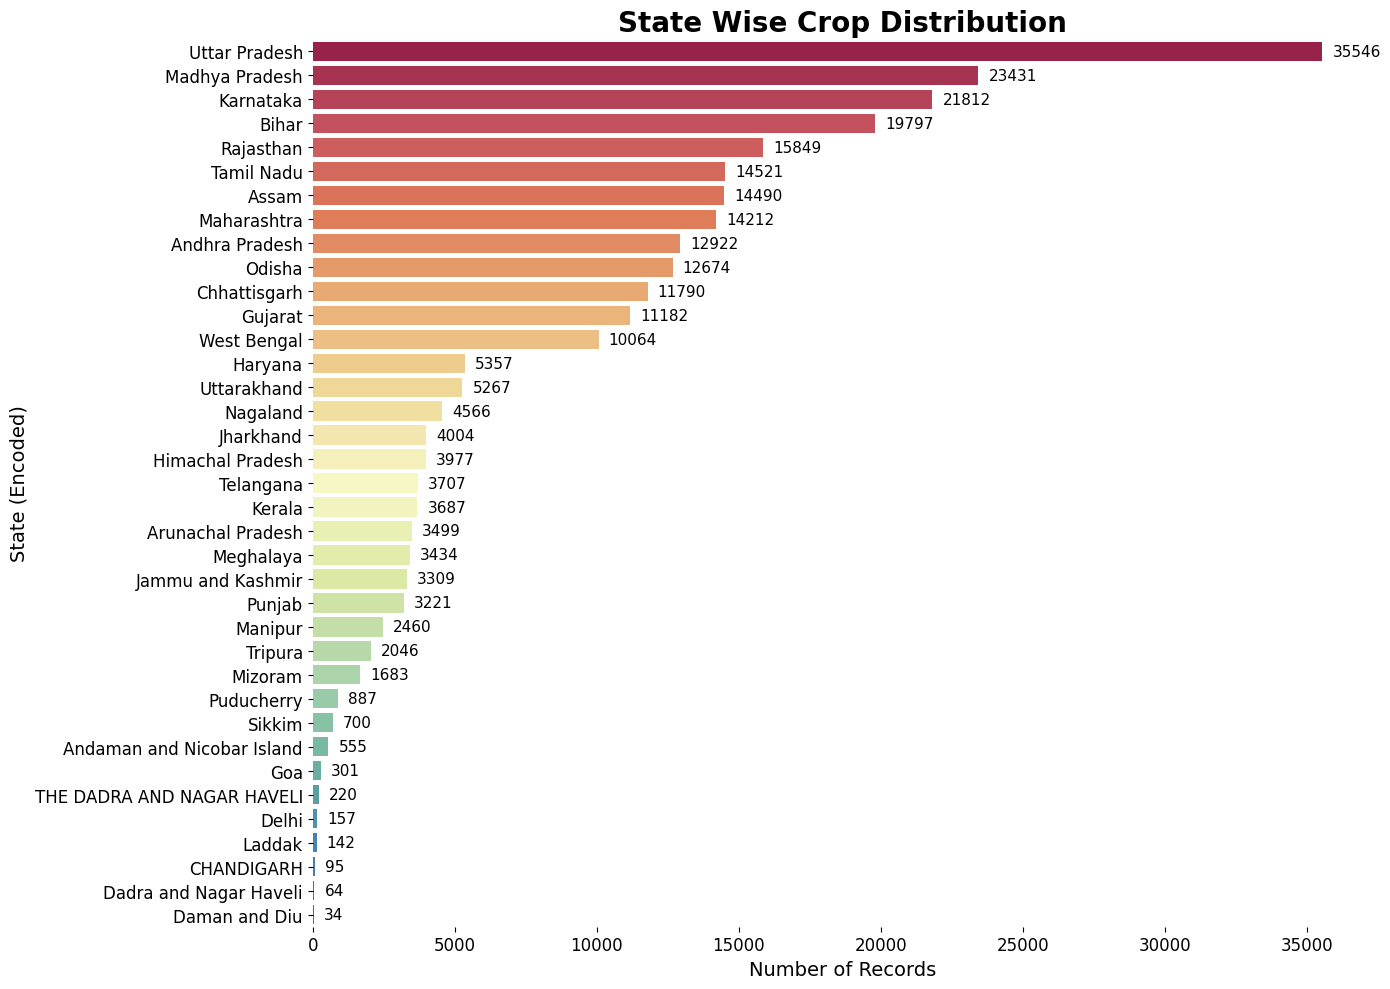

In [20]:
# Improved State wise distribution of crop with better visuals
plt.figure(figsize=(14, 10))
ax = sns.countplot(
    y='State',
    data=df,
    palette='Spectral',
    order=df['State'].value_counts().index
)
plt.title('State Wise Crop Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Number of Records', fontsize=14)
plt.ylabel('State (Encoded)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(df['State'].value_counts().values):
    ax.text(v + max(df['State'].value_counts().values)*0.01, i, str(v), color='black', va='center', fontsize=11)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Crop wise distribution

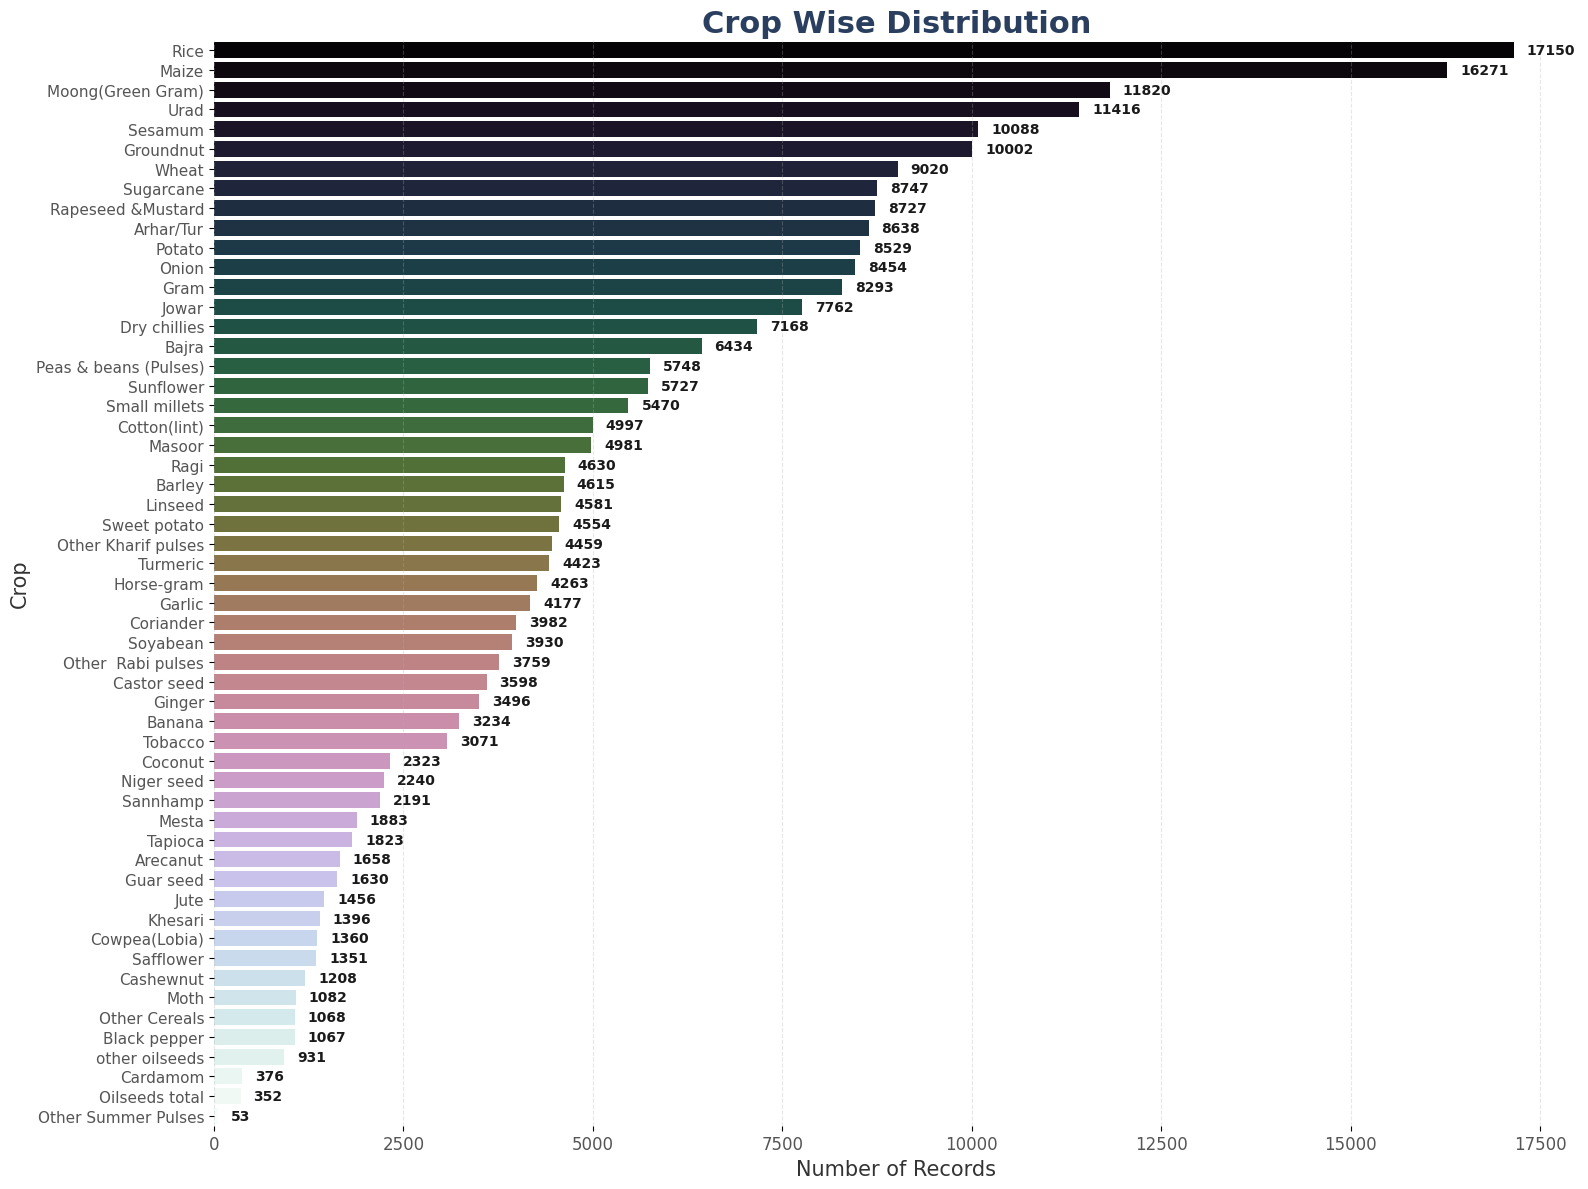

In [21]:
plt.figure(figsize=(16, 12))
ax = sns.countplot(
    y='Crop',
    data=df,
    palette='cubehelix',
    order=df['Crop'].value_counts().index
)
plt.title('Crop Wise Distribution', fontsize=22, fontweight='bold', color='#2a3f5f')
plt.xlabel('Number of Records', fontsize=15, color='#333333')
plt.ylabel('Crop', fontsize=15, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=11, color='#555555')
# labels to bars
for i, v in enumerate(df['Crop'].value_counts().values):
    ax.text(v + max(df['Crop'].value_counts().values)*0.01, i, str(v), color='#1a1a1a', va='center', fontsize=10, fontweight='bold')
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Distribution of crop yeild

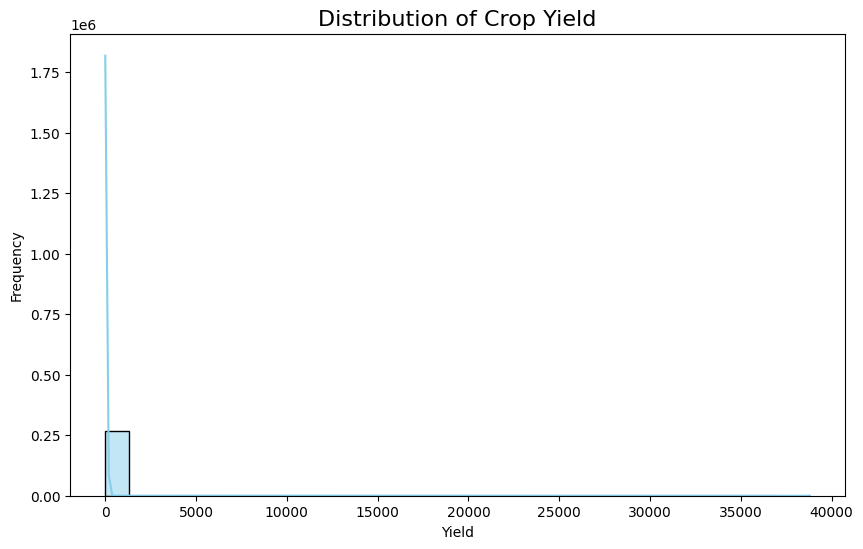

In [22]:
# Histogram of Yield
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Crop Yield', fontsize=16)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()


### Average yeild by season

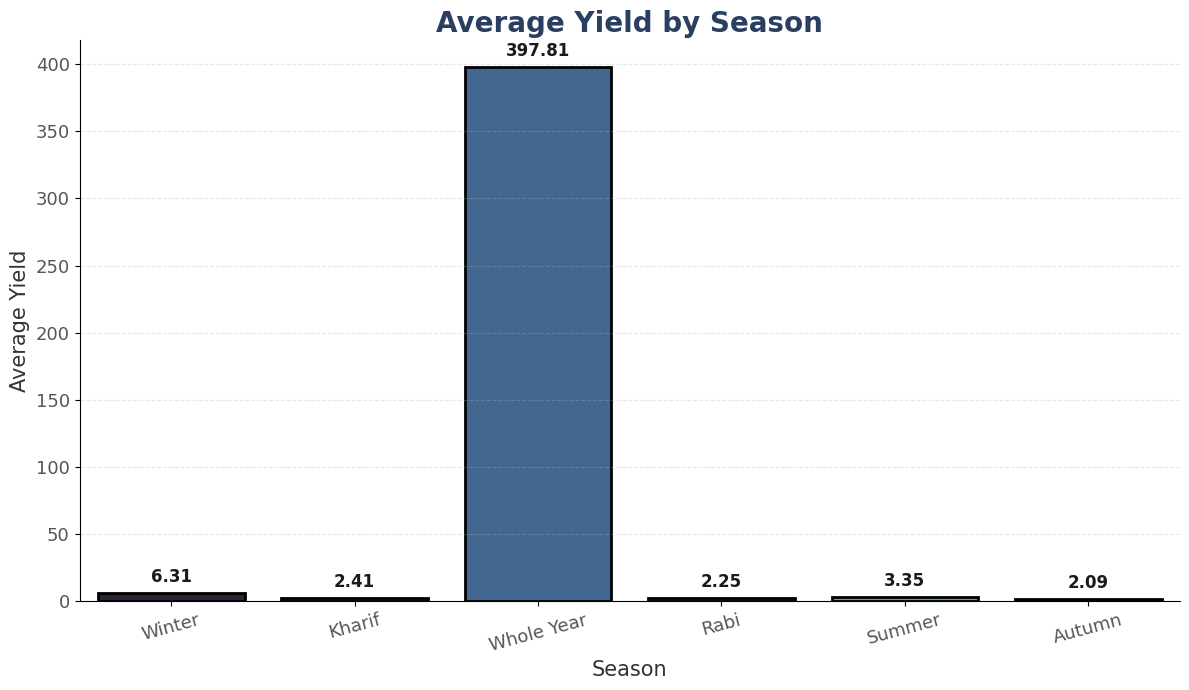

In [23]:

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Season',
    y='Yield',
    data=df,
    palette='mako',
    edgecolor='black',
    linewidth=2,
    ci=None
)
plt.title('Average Yield by Season', fontsize=20, fontweight='bold', color='#2a3f5f')
plt.xlabel('Season', fontsize=15, color='#333333')
plt.ylabel('Average Yield', fontsize=15, color='#333333')
plt.xticks(fontsize=13, color='#555555', rotation=15)
plt.yticks(fontsize=13, color='#555555')

# labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='#1a1a1a',
        xytext=(0, 5), textcoords='offset points'
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


### Production vs Area

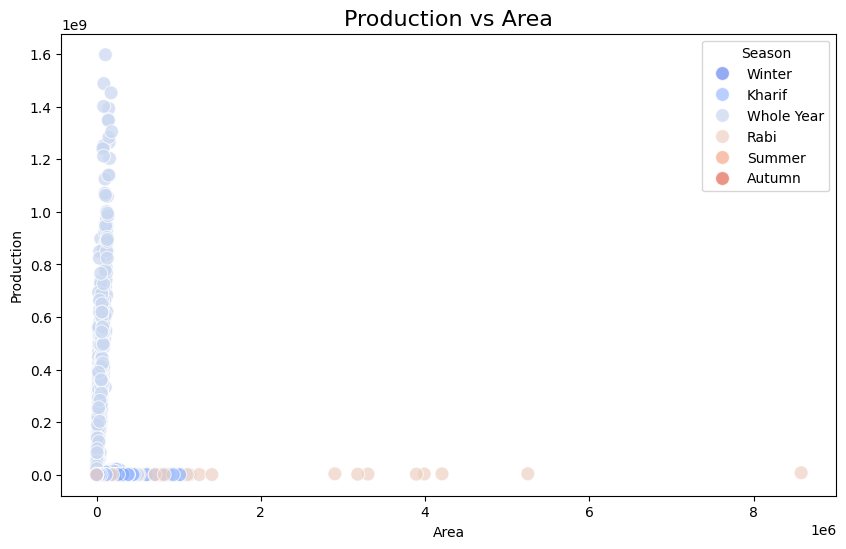

In [24]:
# Scatter plot: Area vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=df, hue='Season', palette='coolwarm', alpha=0.7, edgecolor='w', s=100)
plt.title('Production vs Area', fontsize=16)
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()


### Crop Yield by State

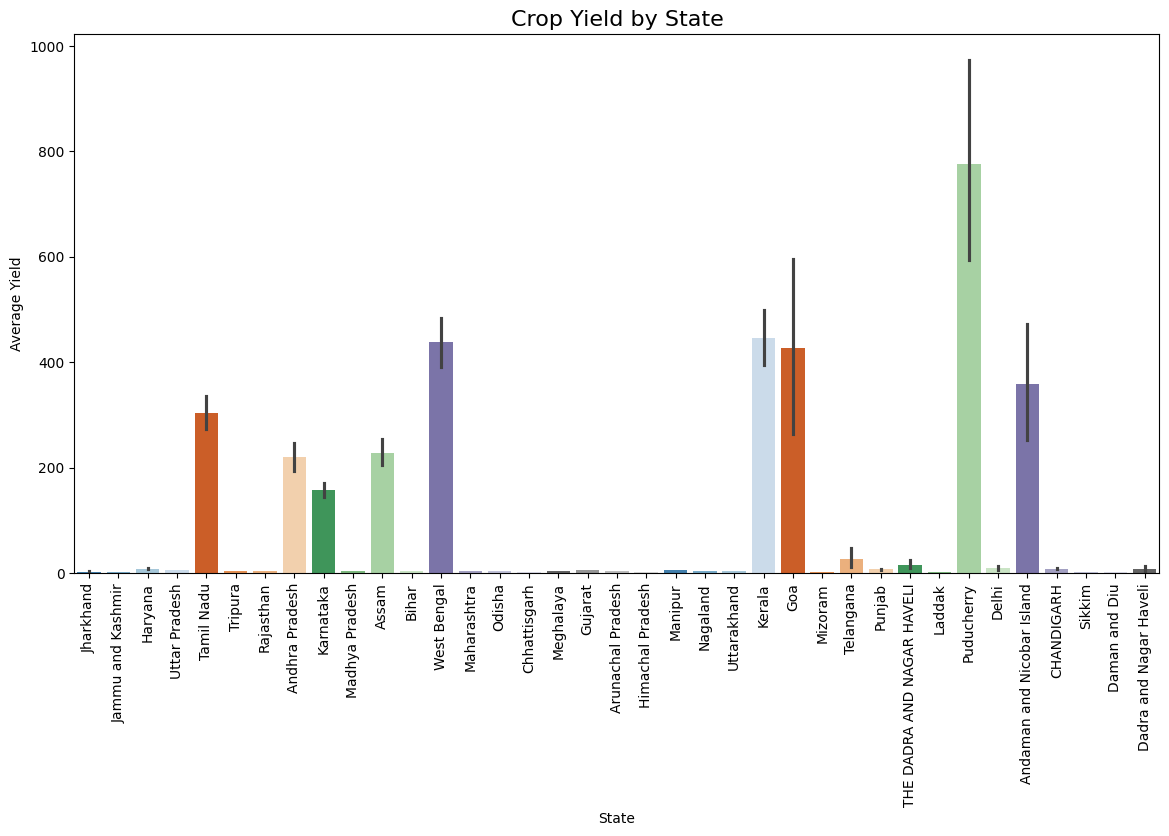

In [25]:

plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Yield', data=df, palette='tab20c')
plt.title('Crop Yield by State', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Yield')
plt.show()


The small vertical line in the middle of each bar is the error bar, showing how much variability or uncertainty there is in that estimate.

### Pie Chart for top 10  crop distribution

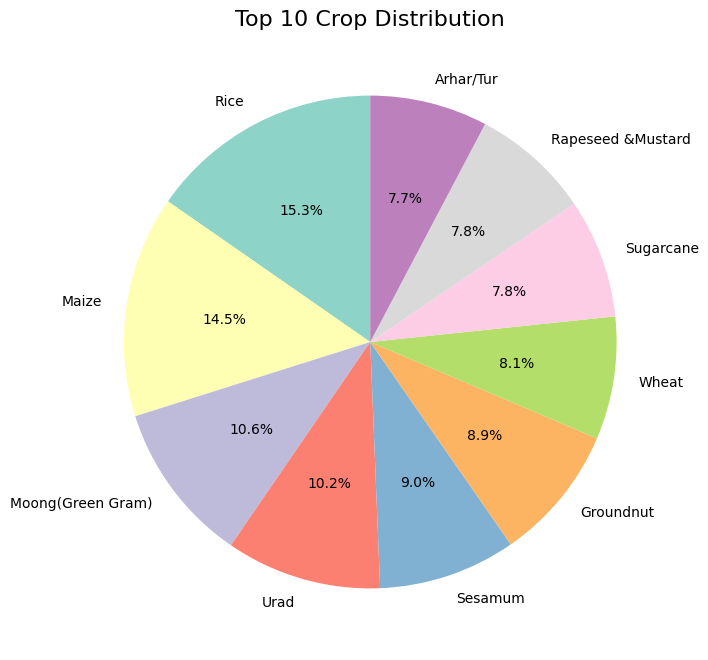

In [26]:
# Assuming df is your DataFrame
crop_counts = df['Crop'].value_counts()

# Select the top 10 crops
top_10_crops = crop_counts.head(10)

# pie chart for the top 5 crops
plt.figure(figsize=(8, 8))
top_10_crops.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_10_crops)))
plt.title('Top 10 Crop Distribution', fontsize=16)
plt.ylabel('')
plt.show()


### Correlation Heatmap of Area,production,yeild

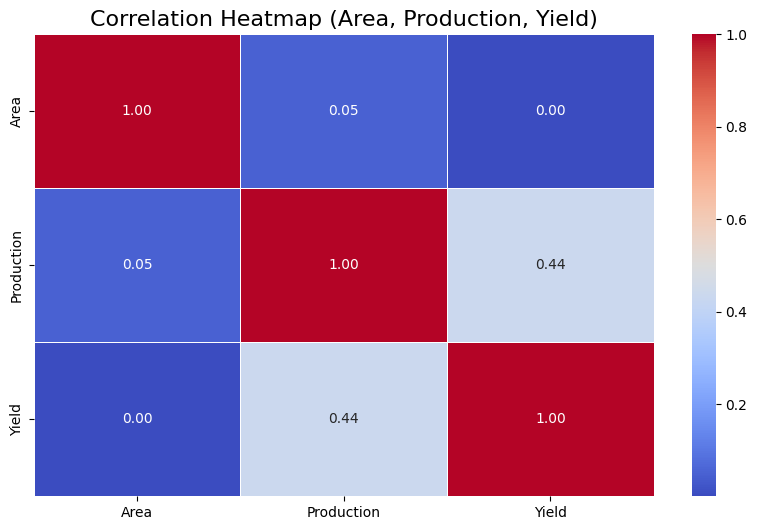

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Area', 'Production', 'Yield']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Area, Production, Yield)', fontsize=16)
plt.show()


### Correlation matrix

In [28]:

correlation_matrix = df[['Area', 'Production', 'Yield']].corr()
print(correlation_matrix)

                Area  Production     Yield
Area        1.000000    0.049254  0.000292
Production  0.049254    1.000000  0.437274
Yield       0.000292    0.437274  1.000000


# ***Machine Leaning - Model***

***Monitiring Skewness of data***

In [29]:
df[['Production', 'Yield']].skew()

Production    36.023703
Yield         14.475546
dtype: float64

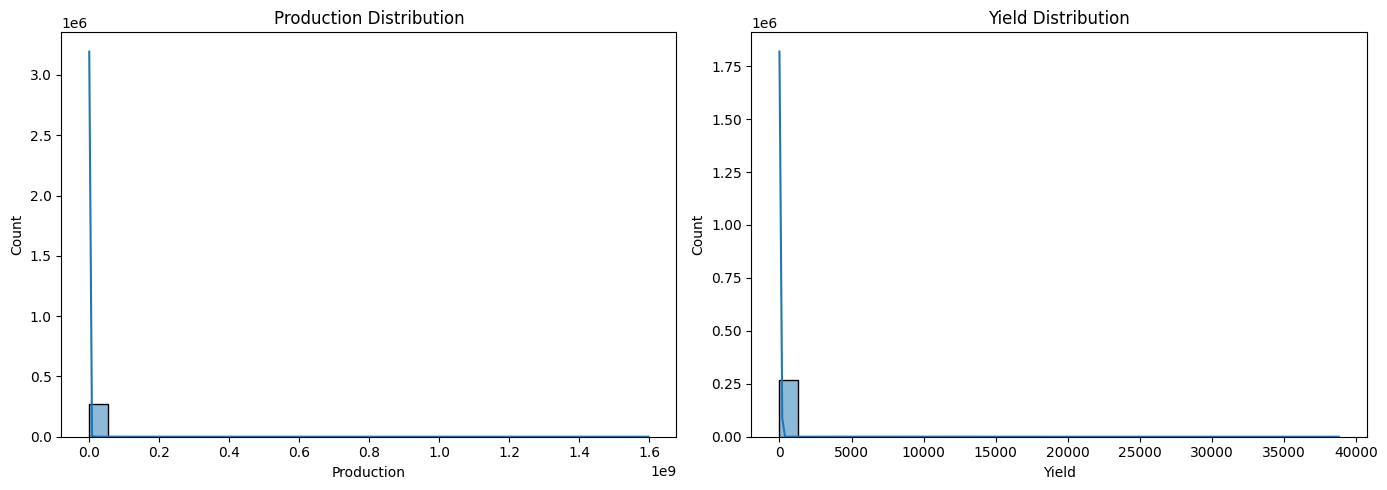

In [30]:
# Checking skewness: display Production and Yield distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Production'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Production Distribution')

sns.histplot(df['Yield'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Yield Distribution')

plt.tight_layout()
plt.show()

In [31]:
import numpy as np

df['Log_Production'] = np.log1p(df['Production']) 
df['Log_Yield'] = np.log1p(df['Yield'])


In [32]:
df[['Log_Production', 'Log_Yield']].skew()

Log_Production    0.354535
Log_Yield         3.473956
dtype: float64

In [33]:
df['Sqrt_Yield'] = np.sqrt(df['Yield'])
df['Sqrt_Yield'].skew()


np.float64(11.220058434535536)

In [34]:
from scipy.stats import boxcox

# Filter out 0 values first because Box-Cox needs strictly positive values
positive_yield = df[df['Yield'] > 0]['Yield']
df.loc[df['Yield'] > 0, 'BoxCox_Yield'], _ = boxcox(positive_yield)
df['BoxCox_Yield'].skew()


np.float64(-0.11771581071115118)

We have reduced the ***skewness*** of:


1.   Production: 36 -> 0.35
2.   List item: 14 -> -0.117



***Step 1: Encoding Categorical Variables***

In [35]:
df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield', 'Log_Production', 'Log_Yield', 'Sqrt_Yield',
       'BoxCox_Yield'],
      dtype='object')

In [36]:
# Assuming df is your entire DataFrame
label_encoder_state = LabelEncoder()
label_encoder_district = LabelEncoder()
label_encoder_crop = LabelEncoder()
label_encoder_season = LabelEncoder()

df['State'] = label_encoder_state.fit_transform(df['State'])
df['District'] = label_encoder_district.fit_transform(df['District'])
df['Crop'] = label_encoder_crop.fit_transform(df['Crop'])
df['Season'] = label_encoder_season.fit_transform(df['Season'])

***Step 2: Train-Test Split***

In [37]:
X = df.drop(['Yield'], axis=1)
y = df['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (271662, 11)
y shape: (271662,)


***Step 3: Model Training using RandomForestRegressor***

In [39]:
import dask.dataframe as dd
from sklearn.ensemble import RandomForestRegressor
from dask_ml.wrappers import ParallelPostFit

base_rf = RandomForestRegressor(n_estimators=50, random_state=42)

dask_model = ParallelPostFit(base_rf)

partition_size = len(X_train) // 4
dask_X_train = dd.from_pandas(X_train, npartitions=partition_size)
dask_y_train = dd.from_pandas(pd.Series(y_train), npartitions=partition_size)
# Train,Fit the model
try:
    dask_model.fit(dask_X_train.compute(), dask_y_train.compute())
    print("Dask-powered model training completed successfully!")
except Exception as e:
    print(f"Error with Dask: {e}")
    print("Falling back to regular training...")
    model_fallback = RandomForestRegressor(n_estimators=50, random_state=42)
    model_fallback.fit(X_train, y_train)
    dask_model = model_fallback

Dask-powered model training completed successfully!


In [40]:
y_pred = dask_model.predict(X_test)

### Scores

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 0.24765571567923703
Mean Squared Error (MSE): 355.10602710760924
Root Mean Squared Error (RMSE): 18.844257138651265
R2 Score: 0.9996429356483104


Using simple random Forest because ParallelPostFit show combatibily issues 

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Feature importance

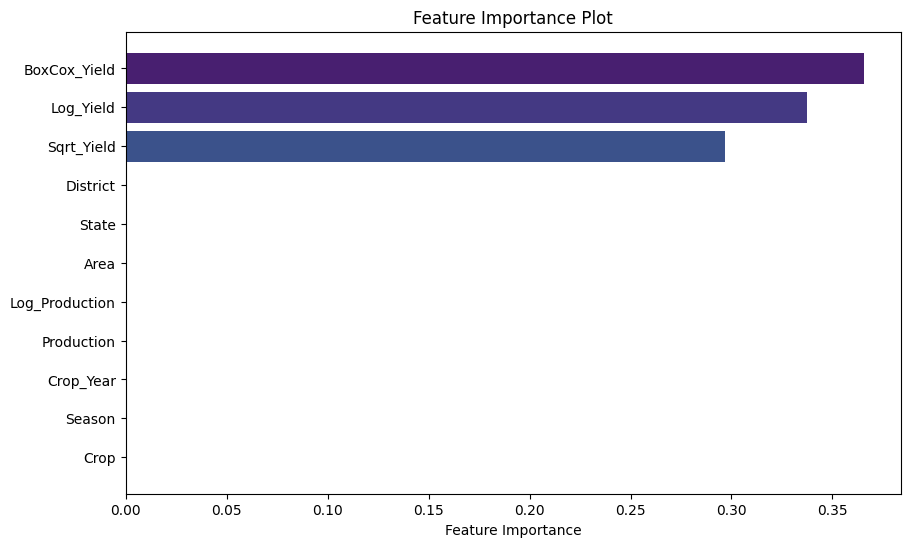

In [43]:
importances = model.feature_importances_
#  feature names
feature_names = X_train.columns 
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(importances))
plt.barh(range(len(importances)), importances[indices], align='center', color=[colors[i] for i in range(len(importances))])
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  
plt.show()

# ***Model Testing***

In [44]:
import joblib

joblib.dump(label_encoder_state, 'label_encoder_state.pkl')
joblib.dump(label_encoder_district, 'label_encoder_district.pkl')
joblib.dump(label_encoder_crop, 'label_encoder_crop.pkl')
joblib.dump(label_encoder_season, 'label_encoder_season.pkl')


joblib.dump(dask_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [45]:
joblib.dump(X.columns, 'X_columns.pkl')

['X_columns.pkl']

In [46]:
import joblib

# map to districts
state_district_map = df.groupby('State')['District'].unique().to_dict()

joblib.dump(state_district_map, 'state_district_map.pkl')


['state_district_map.pkl']

### Some predictions to test model

In [47]:
import joblib
import pandas as pd
import numpy as np
from scipy.stats import boxcox

label_encoder_state = joblib.load('label_encoder_state.pkl')
label_encoder_district = joblib.load('label_encoder_district.pkl')
label_encoder_crop = joblib.load('label_encoder_crop.pkl')
label_encoder_season = joblib.load('label_encoder_season.pkl')

model = joblib.load('random_forest_model.pkl')

X = joblib.load('X_columns.pkl')  

def encode_with_unseen(encoder, data, default_value=-1):
    try:
        return encoder.transform(data)
    except ValueError:
        return [default_value if label not in encoder.classes_ else encoder.transform([label])[0] for label in data]

data = {
    'State': ['Jharkhand', 'Jammu and Kashmir', 'Haryana', 'Uttar Pradesh', 'Tamil Nadu'],
    'District': ['RAMGARH', 'REASI', 'GURGAON', 'JALAUN', 'MADURAI'],
    'Crop': ['Potato', 'Moong(Green Gram)', 'Sweet potato', 'Sannhamp', 'Sugarcane'],
    'Crop_Year': [2013, 2015, 2009, 2010, 2006],
    'Season': ['Winter', 'Kharif', 'Whole Year', 'Kharif', 'Whole Year'],
    'Area': [1361.0, 13.0, 39.0, 9.0, 6006.0],
    'Production': [7544.0, 9.0, 800.0, 3.0, 656204.0]
}


input_df = pd.DataFrame(data)


input_df['State'] = encode_with_unseen(label_encoder_state, input_df['State'])
input_df['District'] = encode_with_unseen(label_encoder_district, input_df['District'])
input_df['Crop'] = encode_with_unseen(label_encoder_crop, input_df['Crop'])
input_df['Season'] = encode_with_unseen(label_encoder_season, input_df['Season'])

# Calculate Yield
input_df['Yield'] = input_df['Production'] / input_df['Area']

# Apply skewness transformations
input_df['Log_Production'] = np.log1p(input_df['Production'])
input_df['Log_Yield'] = np.log1p(input_df['Yield'])
input_df['Sqrt_Yield'] = np.sqrt(input_df['Yield'])

# Handle Box-Cox
input_df['BoxCox_Yield'] = 0
positive_yield = input_df['Yield'][input_df['Yield'] > 0]
if not positive_yield.empty:
    input_df.loc[input_df['Yield'] > 0, 'BoxCox_Yield'], _ = boxcox(positive_yield)


input_df = input_df.reindex(columns=X, fill_value=0)

# Predict
input_pred = model.predict(input_df)


print("Final Input Data for Prediction:")
print(input_df)

print("\nPredictions:")
for i, pred in enumerate(input_pred):
    print(f"Predicted Yield for row {i+1}: {pred}")


Final Input Data for Prediction:
   State  District  Crop  Crop_Year  Season    Area  Production  \
0     15       532    37       2013       5  1361.0      7544.0   
1     14       540    27       2015       1    13.0         9.0   
2     12       231    48       2009       4    39.0       800.0   
3     34       264    42       2010       1     9.0         3.0   
4     31       391    46       2006       4  6006.0    656204.0   

   Log_Production  Log_Yield  Sqrt_Yield  BoxCox_Yield  
0        8.928640   1.878393    2.354354      1.652364  
1        2.302585   0.526093    0.832050     -0.370581  
2        6.685861   3.068649    4.529108      2.837151  
3        1.386294   0.287682    0.577350     -1.124366  
4       13.394229   4.702824   10.452659      4.259810  

Predictions:
Predicted Yield for row 1: 6.264800000000001
Predicted Yield for row 2: 0.6934000000000026
Predicted Yield for row 3: 33.03300000000001
Predicted Yield for row 4: 0.343800000000003
Predicted Yield for row 5: 

## Binary Classification

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Ensure 'Log_Production' is in the DataFrame
if 'Log_Production' not in df.columns:
    df['Log_Production'] = np.log1p(df['Production'])

# Create binary target for classification
threshold = df['Yield'].median()
y_binary = (df['Yield'] > threshold).astype(int)  # 1: High Yield, 0: Low Yield

# Check class balance
print("Class Distribution (0: Low Yield, 1: High Yield):")
print(y_binary.value_counts(normalize=True))

# Define feature set
features = ['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area', 'Log_Production']
X_full = df[features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_binary, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]




Class Distribution (0: Low Yield, 1: High Yield):
Yield
0    0.50141
1    0.49859
Name: proportion, dtype: float64


## Calculate F1 Score

In [49]:

f1 = f1_score(y_test, y_pred)
print("F1 Score: " + str(round(f1, 4)))

F1 Score: 0.9175


## Calculate AUC-ROC Score

In [50]:

roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score: " + str(round(roc_auc, 4)))

AUC-ROC Score: 0.9848


## Perform cross-validation

In [51]:
cv_f1 = cross_val_score(model, X_full, y_binary, cv=3, scoring='f1', n_jobs=-1)
cv_roc_auc = cross_val_score(model, X_full, y_binary, cv=3, scoring='roc_auc', n_jobs=-1)
print("Cross-Validation F1 Score: " + str(round(cv_f1.mean(), 4)) + " ± " + str(round(cv_f1.std(), 4)))
print("Cross-Validation AUC-ROC: " + str(round(cv_roc_auc.mean(), 4)) + " ± " + str(round(cv_roc_auc.std(), 4)))

Cross-Validation F1 Score: 0.9154 ± 0.0028
Cross-Validation AUC-ROC: 0.9836 ± 0.0009


## Confusion Matrix

<Figure size 600x400 with 0 Axes>

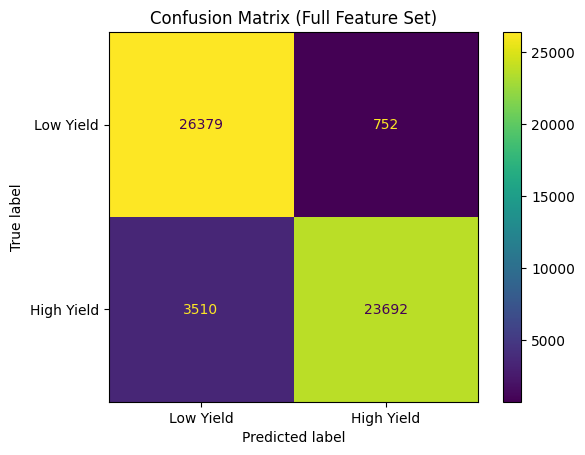

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(cm, display_labels=['Low Yield', 'High Yield']).plot()
plt.title("Confusion Matrix (Full Feature Set)")
plt.show()

## ROC Curve

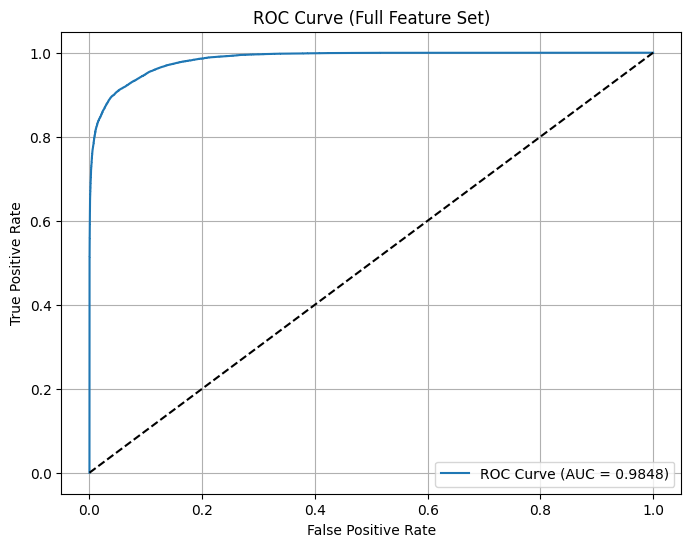

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = ' + str(round(roc_auc, 4)) + ')')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve (Full Feature Set)")
plt.legend()
plt.grid()
plt.show()

## Feature Importance

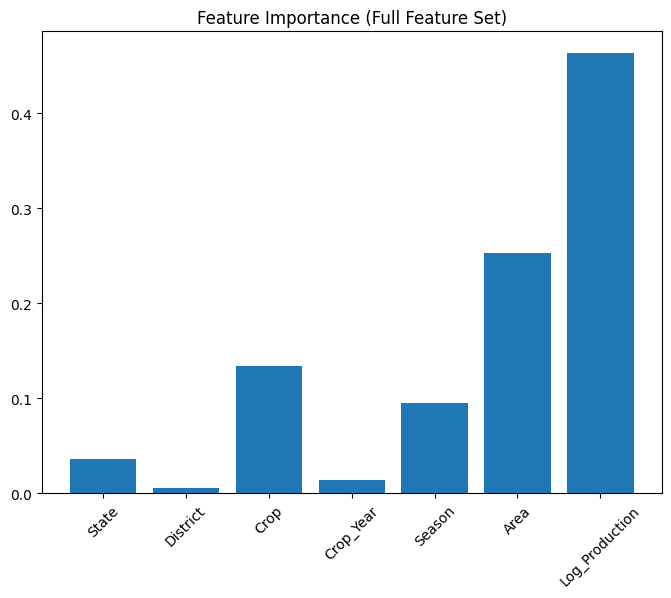

['random_forest_classifier_full_feature_set.pkl']

In [54]:
importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(X_full.columns, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance (Full Feature Set)")
plt.show()

# Save the trained model
joblib.dump(model, 'random_forest_classifier_full_feature_set.pkl')

## Real World Test Case 

In [55]:
# Load Encoders
label_encoder_state = joblib.load('label_encoder_state.pkl')
label_encoder_district = joblib.load('label_encoder_district.pkl')
label_encoder_crop = joblib.load('label_encoder_crop.pkl')
label_encoder_season = joblib.load('label_encoder_season.pkl')
model_clf = joblib.load('random_forest_classifier_full_feature_set.pkl')


def encode_with_unseen(encoder, data, default_value=-1):
    try:
        return encoder.transform(data)
    except ValueError:
        return [default_value if label not in encoder.classes_ else encoder.transform([label])[0] for label in data]

# Sample data
test_data = {
    'State': ['Punjab', 'Maharashtra'],
    'District': ['LUDHIANA', 'PUNE'],
    'Crop': ['Wheat', 'Sugarcane'],
    'Crop_Year': [2018, 2017],
    'Season': ['Rabi', 'Whole Year'],
    'Area': [1000.0, 5000.0],
    'Production': [4000.0, 350000.0]
}

test_df = pd.DataFrame(test_data)
test_df['State'] = encode_with_unseen(label_encoder_state, test_df['State'])
test_df['District'] = encode_with_unseen(label_encoder_district, test_df['District'])
test_df['Crop'] = encode_with_unseen(label_encoder_crop, test_df['Crop'])
test_df['Season'] = encode_with_unseen(label_encoder_season, test_df['Season'])
test_df['Log_Production'] = np.log1p(test_df['Production'])

X_test_real = test_df[['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area', 'Log_Production']]

y_pred_real = model_clf.predict(X_test_real)
y_prob_real = model_clf.predict_proba(X_test_real)[:, 1]

# results
for i, row in test_df.iterrows():
    print(f"Test Case {i+1}: State={row['State']}, District={row['District']}, Crop={row['Crop']}, "
          f"Area={row['Area']}, Production={row['Production']}, Season={row['Season']}")
    print(f"  Predicted: {'High Yield' if y_pred_real[i] == 1 else 'Low Yield'} (Probability: {y_prob_real[i]:.2f})\n")

Test Case 1: State=27.0, District=387.0, Crop=53.0, Area=1000.0, Production=4000.0, Season=2.0
  Predicted: High Yield (Probability: 0.90)

Test Case 2: State=20.0, District=511.0, Crop=46.0, Area=5000.0, Production=350000.0, Season=4.0
  Predicted: High Yield (Probability: 0.97)

